In [13]:
#Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Read data file
f=open('data.txt', 'r').readlines()
N=len(f)

In [3]:
#Create array for label and features
label = np.ndarray(shape=(N-1,1), dtype=int)
feature = np.ndarray(shape=(N-1,10), dtype=float)

In [4]:
#Read label and feature values
for i in range(0,N-1):
    w = f[i+1].split()
    label[i] = w[0]
    for j in range(0,10):
        feature[i][j] = w[j+1]

In [5]:
#Perform feature scaling
from sklearn.preprocessing import StandardScaler  
feature = StandardScaler().fit_transform(feature)

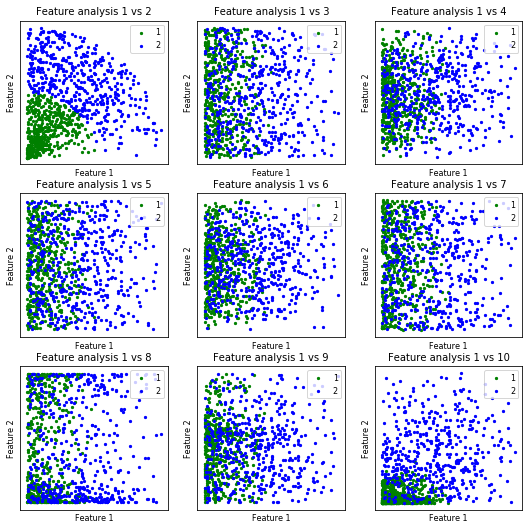

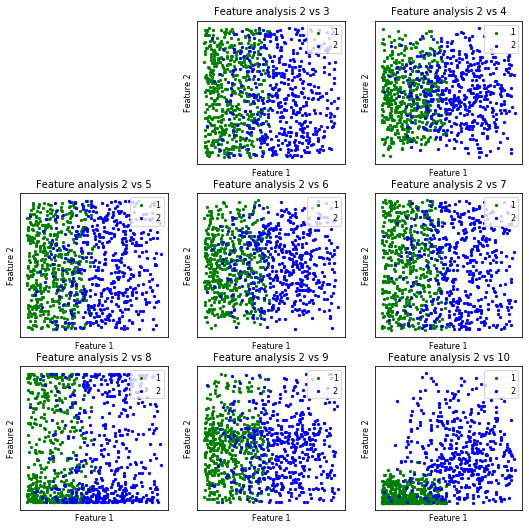

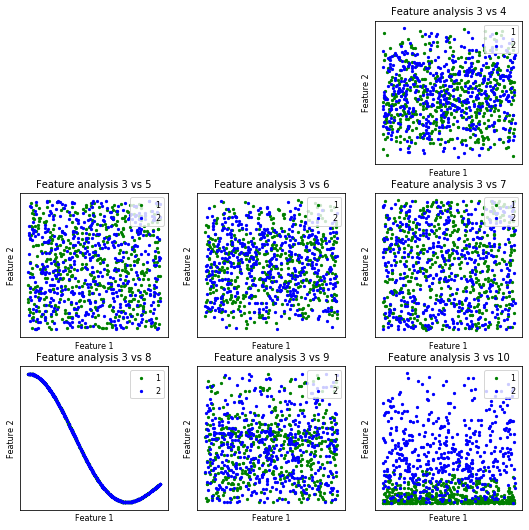

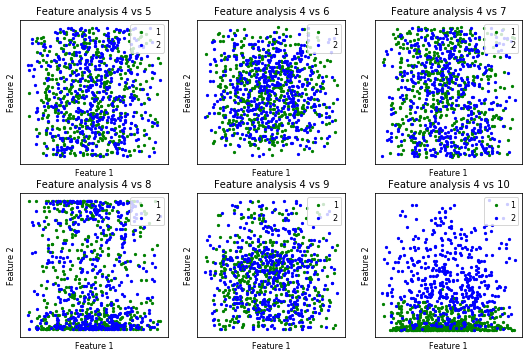

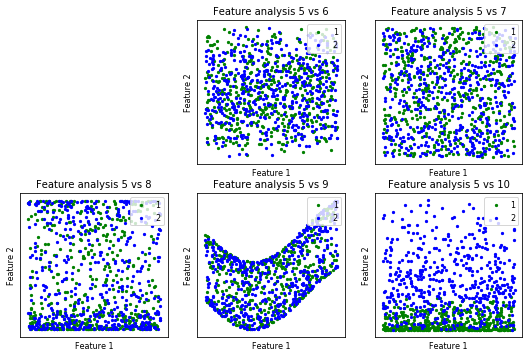

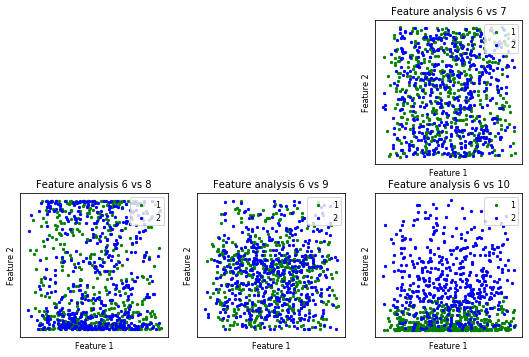

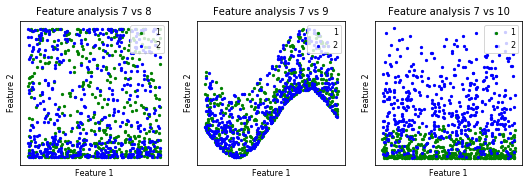

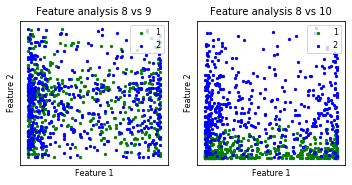

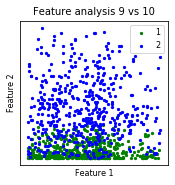

In [9]:
#Plot graph for all features vs each other (2 at a time)
for j in range(0,9):
    fig = plt.figure(figsize = (9,9))
    for i in range(j+1,10):
        ax = fig.add_subplot(3,3,i) 
        ax.set_xlabel('Feature 1', fontsize = 8)
        ax.set_ylabel('Feature 2', fontsize = 8)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title('Feature analysis {} vs {}'.format(j+1,i+1), fontsize = 10)
        targets = [1, 2]
        colors = ['g', 'b']
        finalDf = pd.concat([pd.DataFrame({'feature 1':feature[: , j]}),pd.DataFrame({'feature 2':feature[: , i]}),pd.DataFrame({'target':label[:,0]})], axis = 1)
        for target, color in zip(targets,colors):
            indicesToKeep = finalDf['target'] == target
            ax.scatter(finalDf.loc[indicesToKeep, 'feature 1']
                   , finalDf.loc[indicesToKeep, 'feature 2']
                   , c = color
                   , s = 5)
        ax.legend(targets,loc=1, prop={'size': 8})
    file_name = 'graphs/plot_'+str(j) +'.png'
    fig.savefig(file_name)

# Conclusion from the plots

Plot of features 1 vs feature 2 can be easily distinguishable, along with plot of feature 3 vs feature 8. These pair of features can be used to plot the dataset and train the model.

In [10]:
#Verify using PCA Convert 2-dimensional array feature x and feature y into 1D array using PCA 
from sklearn.decomposition import PCA
pca = PCA(n_components=1)

In [11]:
# Check for maximum variance Ratio
for j in range(0,9):
    for i in range(j+1,10):
        finalDf = pd.concat([pd.DataFrame({'feature 1':feature[: , j]}),pd.DataFrame({'feature 2':feature[: , i]})], axis = 1)
        principalComponents = pca.fit_transform(finalDf)
        principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1'])
        print("Variance : "+str(j+1) +" vs "+str(i+1) + " " + str(pca.explained_variance_ratio_))

Variance : 1 vs 2 [0.60185502]
Variance : 1 vs 3 [0.51331434]
Variance : 1 vs 4 [0.53577351]
Variance : 1 vs 5 [0.5122996]
Variance : 1 vs 6 [0.51136194]
Variance : 1 vs 7 [0.52795251]
Variance : 1 vs 8 [0.5080902]
Variance : 1 vs 9 [0.50551827]
Variance : 1 vs 10 [0.70843126]
Variance : 2 vs 3 [0.51284582]
Variance : 2 vs 4 [0.51364179]
Variance : 2 vs 5 [0.51399512]
Variance : 2 vs 6 [0.50957615]
Variance : 2 vs 7 [0.52942058]
Variance : 2 vs 8 [0.51392033]
Variance : 2 vs 9 [0.50525977]
Variance : 2 vs 10 [0.74562299]
Variance : 3 vs 4 [0.52596273]
Variance : 3 vs 5 [0.5116986]
Variance : 3 vs 6 [0.50144882]
Variance : 3 vs 7 [0.51624331]
Variance : 3 vs 8 [0.96538812]
Variance : 3 vs 9 [0.50718756]
Variance : 3 vs 10 [0.50399196]
Variance : 4 vs 5 [0.51243867]
Variance : 4 vs 6 [0.50208561]
Variance : 4 vs 7 [0.51966986]
Variance : 4 vs 8 [0.51660687]
Variance : 4 vs 9 [0.51070635]
Variance : 4 vs 10 [0.51570476]
Variance : 5 vs 6 [0.52352081]
Variance : 5 vs 7 [0.51257143]
Varianc

# Conclusion from the PCA analysis

Principle component features are extracted from given features (taken in pairs), it shows that Principle component feature from 3 and 8 has higest variance ratio.